# Customer Satisfaction Response to AI
Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: Jan 20 2025

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler  # Add this import

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [112]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Ai in Retail/AI in Retail Dataset.csv", encoding='ISO-8859-1')

In [113]:
data.head(3)

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,...,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,...,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO
2,INDIA,YES,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,YES,NO,YES,YES,YES,YES,YES,NO,NO


## Preprocessing

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           656 non-null    object
 1   Online_Consumer                   656 non-null    object
 2   Age                               656 non-null    object
 3   Annual_Salary                     656 non-null    object
 4   Gender                            656 non-null    object
 5   Education                         656 non-null    object
 6   Payment_Method_Credit/Debit       656 non-null    object
 7   Living_Region                     656 non-null    object
 8   Online_Service_Preference         656 non-null    object
 9   AI_Endorsement                    656 non-null    object
 10  AI_Privacy_No_Trust               656 non-null    object
 11  AI_Enhance_Experience             656 non-null    object
 12  AI_Satisfication      

In [116]:
data.isnull().sum()

Country                             0
Online_Consumer                     0
Age                                 0
Annual_Salary                       0
Gender                              0
Education                           0
Payment_Method_Credit/Debit         0
Living_Region                       0
Online_Service_Preference           0
AI_Endorsement                      0
AI_Privacy_No_Trust                 0
AI_Enhance_Experience               0
AI_Satisfication                    0
AI_Tools_Used _Chatbots             0
AI_Tools_Used_Virtual_Assistant     0
AI_Tools_Used_Voice&Photo_Search    0
Payment_Method_COD                  0
Payment_Method_Ewallet              0
Product_Category_Appliances         0
Product_Category_Electronics        0
Product_Category_Groceries          0
Product_Category_Personal_Care      0
Product_Category_Clothing           0
dtype: int64

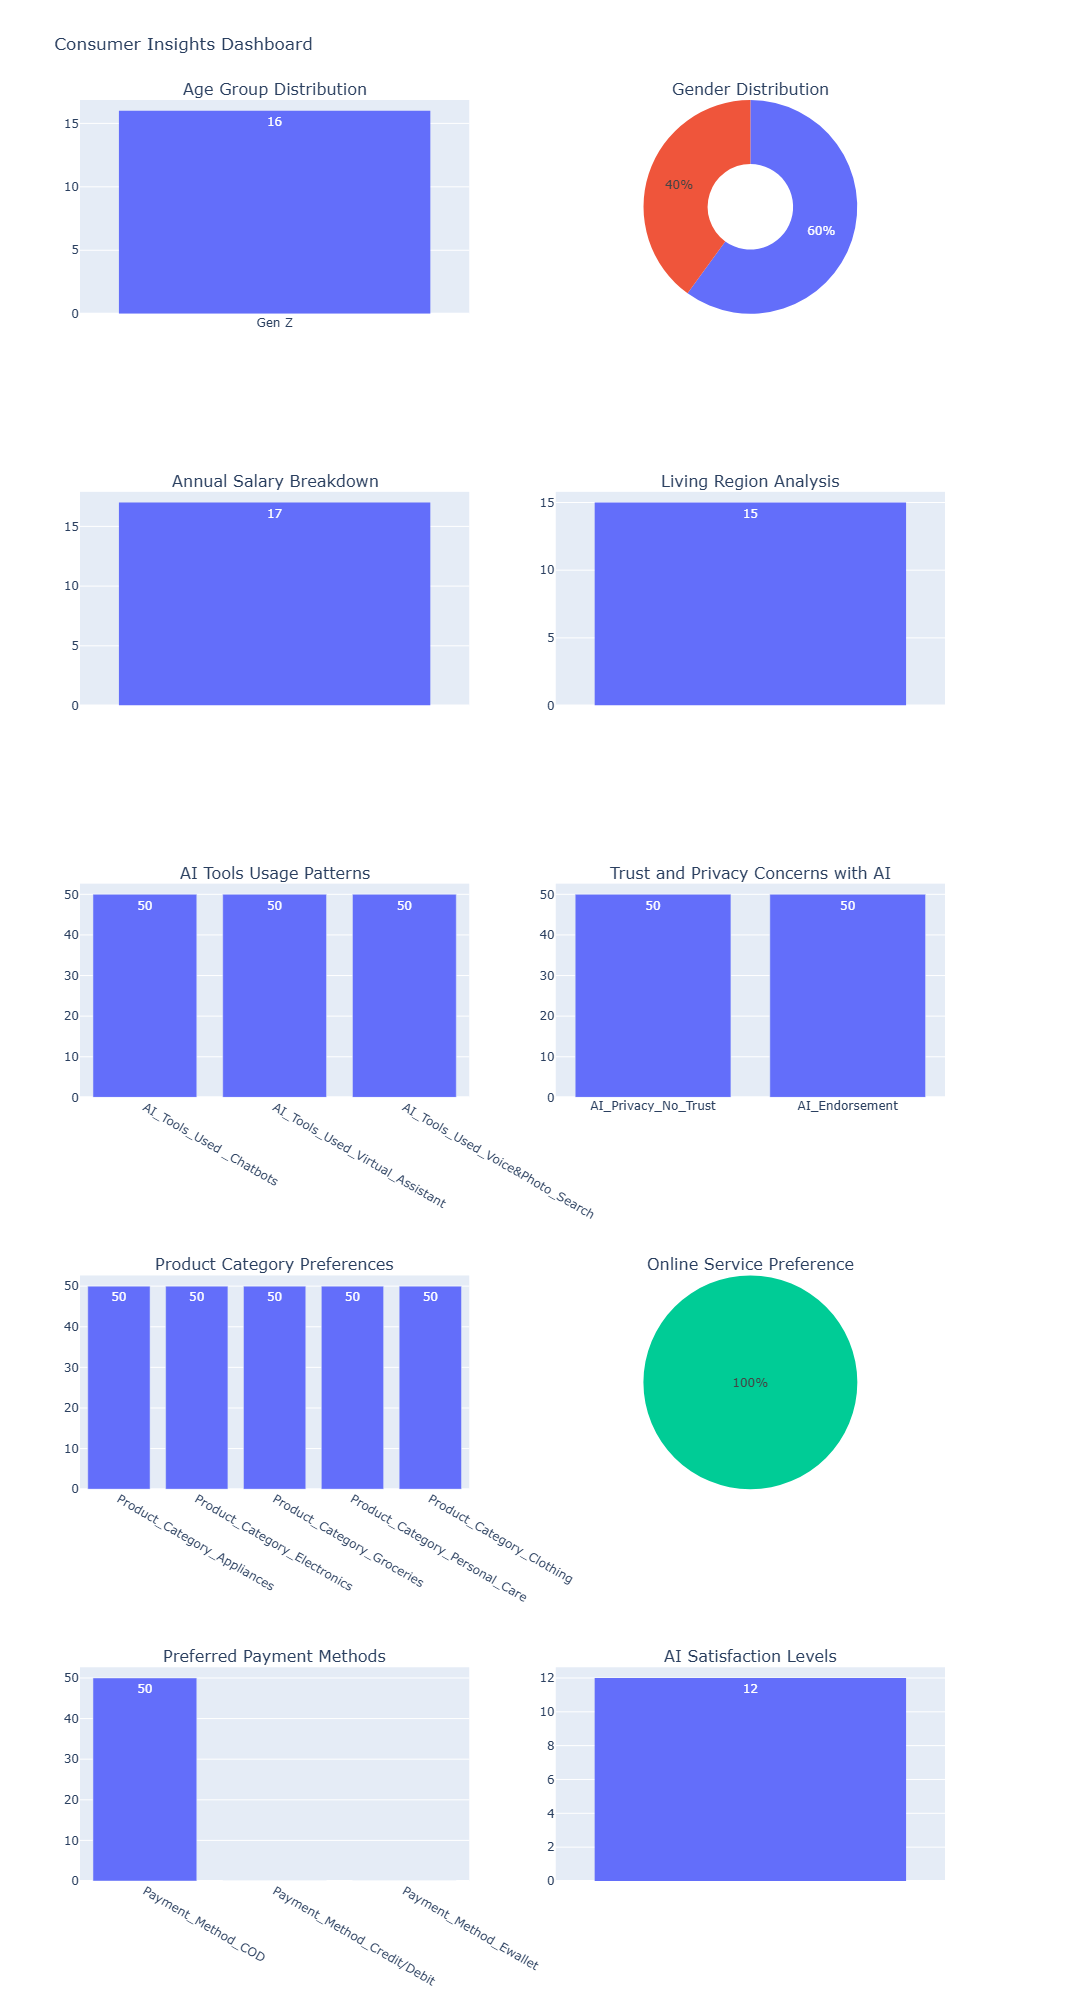

In [117]:
# Creating a dashboard layout using subplots
from plotly.subplots import make_subplots

dashboard = make_subplots(
    rows=5, cols=2, 
    subplot_titles=("Age Group Distribution", "Gender Distribution",
                    "Annual Salary Breakdown", "Living Region Analysis",
                    "AI Tools Usage Patterns", "Trust and Privacy Concerns with AI",
                    "Product Category Preferences", "Online Service Preference",
                    "Preferred Payment Methods", "AI Satisfaction Levels"),
    specs=[
        [{"type": "xy"}, {"type": "domain"}],  # First row: Bar and Pie chart
        [{"type": "xy"}, {"type": "xy"}],     # Second row: Both Bar charts
        [{"type": "xy"}, {"type": "xy"}],     # Third row: Both Bar charts
        [{"type": "xy"}, {"type": "domain"}], # Fourth row: Bar and Pie chart
        [{"type": "xy"}, {"type": "xy"}]      # Fifth row: Both Bar charts
    ],
    vertical_spacing=0.1
)

# Add traces to dashboard
dashboard.add_trace(fig1.data[0], row=1, col=1)  # Age Group Distribution
dashboard.add_trace(fig2.data[0], row=1, col=2)  # Gender Distribution
dashboard.add_trace(fig3.data[0], row=2, col=1)  # Annual Salary Breakdown
dashboard.add_trace(fig4.data[0], row=2, col=2)  # Living Region Analysis
dashboard.add_trace(fig5.data[0], row=3, col=1)  # AI Tools Usage Patterns
dashboard.add_trace(fig6.data[0], row=3, col=2)  # Trust and Privacy Concerns
dashboard.add_trace(fig7.data[0], row=4, col=1)  # Product Category Preferences
dashboard.add_trace(fig8.data[0], row=4, col=2)  # Online Service Preference
dashboard.add_trace(fig9.data[0], row=5, col=1)  # Preferred Payment Methods
dashboard.add_trace(fig10.data[0], row=5, col=2) # AI Satisfaction Levels

# Update layout for the dashboard
dashboard.update_layout(height=2000, width=1200, title_text="Consumer Insights Dashboard", showlegend=False)
dashboard.show()


## Train And Test Modele

In [119]:

# Define features and target variable
X = data.drop(columns=['AI_Endorsement'])
y = data['AI_Endorsement']

# Ensure all categorical variables are encoded
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [121]:
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Calculate the accuracy score
logreg_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 87.12121212121212
Classification Report:               precision    recall  f1-score   support

          NO       0.64      0.43      0.51        21
         YES       0.90      0.95      0.93       111

    accuracy                           0.87       132
   macro avg       0.77      0.69      0.72       132
weighted avg       0.86      0.87      0.86       132



## Decision Tree Classification

In [123]:
# Create and train the Decision Tree Classifier
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)


# Calculate the accuracy score
tree_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('Decision Tree Classifier accuracy:', dec_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Decision Tree Classifier accuracy: 87.87878787878788
Classification Report:               precision    recall  f1-score   support

          NO       0.78      0.33      0.47        21
         YES       0.89      0.98      0.93       111

    accuracy                           0.88       132
   macro avg       0.83      0.66      0.70       132
weighted avg       0.87      0.88      0.86       132



## Random Forest Classification

In [125]:
# Create and train the Random Forest classifier
rand_clf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rand_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test)

# Calculate the accuracy score
random_forest_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('Random Forest Classifier accuracy:', rand_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Random Forest Classifier accuracy: 87.12121212121212
Classification Report:               precision    recall  f1-score   support

          NO       0.83      0.24      0.37        21
         YES       0.87      0.99      0.93       111

    accuracy                           0.87       132
   macro avg       0.85      0.61      0.65       132
weighted avg       0.87      0.87      0.84       132



## SVM

In [127]:
# Create and train the SVM model with RBF kernel
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy and classification report
print('SVM Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

SVM Accuracy:  84.0909090909091
Classification Report:               precision    recall  f1-score   support

          NO       0.50      0.05      0.09        21
         YES       0.85      0.99      0.91       111

    accuracy                           0.84       132
   macro avg       0.67      0.52      0.50       132
weighted avg       0.79      0.84      0.78       132



## Navie Bayes

In [129]:
# Create and train the Naive Bayes classifier
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred = NaiveBayes.predict(X_test)

# Calculate the accuracy score
nb_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('The accuracy of Naive Bayes is:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

The accuracy of Naive Bayes is: 56.060606060606055
Classification Report:               precision    recall  f1-score   support

          NO       0.24      0.81      0.37        21
         YES       0.93      0.51      0.66       111

    accuracy                           0.56       132
   macro avg       0.59      0.66      0.52       132
weighted avg       0.82      0.56      0.62       132



## Accuracy Scores 

In [131]:
# Add the model names and accuracy scores to a list
models = ['Random Forest', 'Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [random_forest_accuracy, logreg_accuracy, nb_accuracy, tree_accuracy]

# Create a DataFrame
accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Display the accuracy scores
print(accuracy_df)

                 Model  Accuracy
0        Random Forest  0.871212
1  Logistic Regression  0.871212
2                  SVM  0.560606
3        Decision Tree  0.878788


## Accuracy Scores Visualization

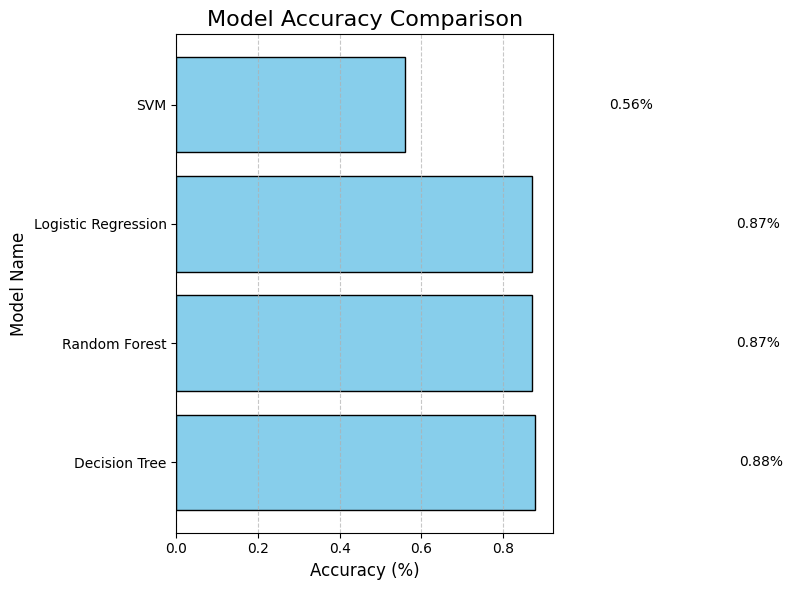

In [133]:
# Sort the data by accuracy for better visualization (optional)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(
    accuracy_df['Model'], 
    accuracy_df['Accuracy'], 
    color='skyblue', 
    edgecolor='black'
)

# Add accuracy values above the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.5,  # Position slightly beyond the bar
        bar.get_y() + bar.get_height() / 2,  # Centered on the bar
        f'{bar.get_width():.2f}%',  # Accuracy with 2 decimal places
        va='center'
    )

# Customize the chart
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('Model Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


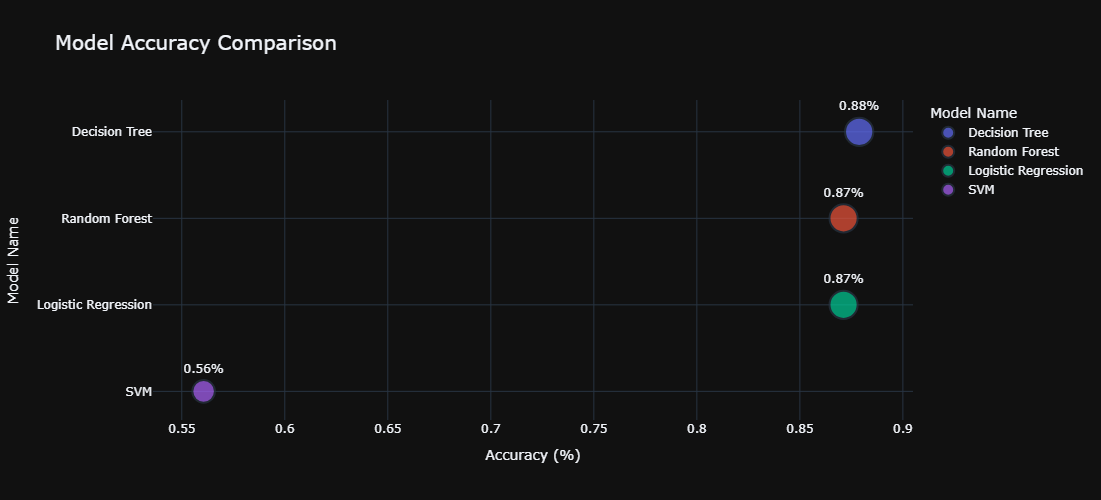

In [134]:
# Create a scatter plot for model accuracies
fig = px.scatter(
    accuracy_df,
    x='Accuracy',  # X-axis: Accuracy
    y='Model',  # Y-axis: Model names
    size='Accuracy',  # Size of the marker proportional to accuracy
    color='Model',  # Color by model for differentiation
    text='Accuracy',
    title='Model Accuracy Comparison',
    labels={'Accuracy': 'Accuracy (%)', 'Model': 'Model Name'}
)

# Update layout for better readability
fig.update_traces(
    marker=dict(line_width=2),  # Thicker marker outlines
    texttemplate='%{text:.2f}%',  # Show accuracy with two decimal points
    textposition='top center'  # Center text above markers
)

# Customize layout for visual clarity
fig.update_layout(
    title_font_size=20,
    xaxis_title='Accuracy (%)',
    yaxis_title='Model Name',
    template='plotly_dark',  # Optional: Use a dark theme
    height=500  # Adjust chart height for better viewing
)

# Show the plot
fig.show()
